In [1]:
import pandas as pandas


In [31]:
import matplotlib as plt


In [29]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import scipy as scy

In [6]:
df= pd.read_csv(r"C:\Users\hp\Desktop\datasets\\Banking Data(1).csv")

In [7]:
df.head()

,Age,Education,Income,Home Value,Marital status,Balance
0,35.9,14.8,"$91,033","$183,104",single,"$38,517"
1,37.7,13.8,"$86,748","$163,843",divorced,"$40,618"
2,36.8,13.8,"$72,245","$142,732",married,"$35,206"
3,35.3,13.2,"$70,639","$145,024",married,"$33,434"
4,35.3,13.2,"$64,879","$135,951",married,"$28,162"


In [8]:
df.dtypes

Age               float64
Education         float64
Income             object
Home Value         object
Marital status     object
Balance            object
dtype: object

In [11]:
   def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [12]:
df['Income'] = df['Income'].apply(clean_currency).astype('float')
df['Home Value'] = df['Home Value'].apply(clean_currency).astype('float')
df['Balance'] = df['Balance'].apply(clean_currency).astype('float')

In [14]:
df.dtypes

Age               float64
Education         float64
Income            float64
Home Value        float64
Marital status     object
Balance           float64
dtype: object

In [15]:
X = df[['Age', 'Education', 'Income', 'Home Value', 'Marital status']]

In [16]:
X = pd.get_dummies(data=X, drop_first=True)

In [17]:
X.head()

,Age,Education,Income,Home Value,Marital status_married,Marital status_single
0,35.9,14.8,91033.0,183104.0,0,1
1,37.7,13.8,86748.0,163843.0,0,0
2,36.8,13.8,72245.0,142732.0,1,0
3,35.3,13.2,70639.0,145024.0,1,0
4,35.3,13.2,64879.0,135951.0,1,0


In [18]:
df.corr()

,Age,Education,Income,Home Value,Balance
Age,1.000000,0.173407,0.477147,0.386493,0.565467
Education,0.173407,1.000000,0.575394,0.753521,0.554881
Income,0.477147,0.575394,1.000000,0.795355,0.951684
Home Value,0.386493,0.753521,0.795355,1.000000,0.766387
Balance,0.565467,0.554881,0.951684,0.766387,1.000000


<AxesSubplot:>

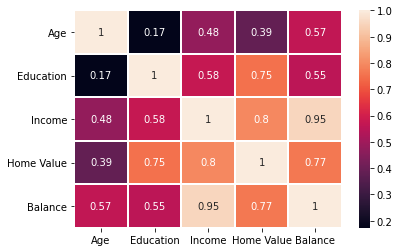

In [19]:
sns.heatmap(df.corr(),annot=True,lw=1)

In [49]:
##defining the responsse variable
Y = df['Balance']

In [24]:
from scipy.stats import norm

In [39]:
import statsmodels.api as sm

In [40]:
import pylab

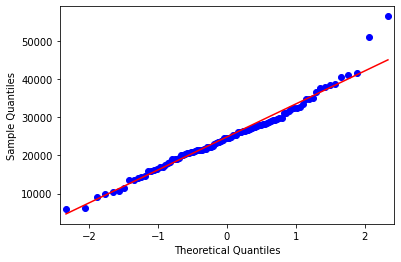

In [51]:
sm.qqplot(Y,  line='s')
pylab.show()

In [50]:
print(Y)

0      38517.0
1      40618.0
2      35206.0
3      33434.0
4      28162.0
        ...   
97     10436.0
98      9904.0
99      9071.0
100    10679.0
101     6207.0
Name: Balance, Length: 102, dtype: float64


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=8)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66, 6)
(36, 6)
(66,)
(36,)


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
# print the intercept
print(model.intercept_)

-6218.447752119981


In [56]:
##determining the parameters
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,275.085127
Education,354.240552
Income,0.392329
Home Value,-0.010989
Marital status_married,-1349.001685
Marital status_single,-1950.577178


In [57]:
predictions = model.predict(X_test)
predictions

array([34224.33020147, 27536.99440007, 41274.05278631, 29716.95757473,
       23395.38902529, 17881.85883509, 16811.74312923, 30469.17375192,
       19658.02777804, 26418.62446891, 19014.8895088 , 31405.18700327,
       43639.81951276, 27754.18499037, 32939.07706269, 19758.17818334,
        7680.4668461 , 26495.46324895, 17182.26866827, 24493.94141963,
       15813.55839854, 18126.78492474, 20643.16737485, 28609.83557741,
       19327.40283363, 21310.63233565, 27692.32689378,  7149.84064047,
       29333.36506389, 17725.53054628, 27540.45270328, 28212.10325145,
       23544.05866737, 19963.2216185 , 28403.59062858, 18401.03597081])

In [58]:
expected_balances =y_test
expected_balances

17    37603.0
23    23584.0
1     40618.0
46    32677.0
57    23293.0
69    20082.0
88    14620.0
29    31283.0
64    19343.0
33    26114.0
78    17077.0
12    34936.0
11    51107.0
40    31054.0
3     33434.0
73    19196.0
99     9071.0
30    24671.0
86    18959.0
55    27005.0
91    13693.0
75    13677.0
82    21670.0
24    26773.0
72    18340.0
50    21345.0
16    24672.0
98     9904.0
19    32576.0
58    16854.0
41    29198.0
44    29706.0
35    20826.0
52    19125.0
34    27570.0
70    15912.0
Name: Balance, dtype: float64

C:\Users\hp\anaconda3\envs\pandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Balance'>

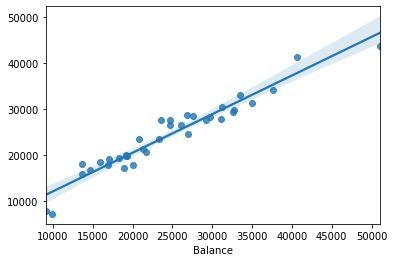

In [59]:
sns.regplot(y_test,predictions)

In [60]:
X_train_Sm= sm.add_constant(X_train)

In [61]:
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.69e-31
Time:                        19:58:12   Log-Likelihood:                -605.22
No. Observations:                  66   AIC:                             1224.
Df Residuals:                      59   BIC:                             1240.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6218

SyntaxError: invalid syntax (<ipython-input-2-e5ae80fd42c1>, line 1)